<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ensemble</a></span><ul class="toc-item"><li><span><a href="#fit-a-decision-tree-with-a-single-node-(decision-rule)" data-toc-modified-id="fit-a-decision-tree-with-a-single-node-(decision-rule)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>fit a decision tree with a single node (decision rule)</a></span></li><li><span><a href="#Decision-tree-----不同的深度" data-toc-modified-id="Decision-tree-----不同的深度-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Decision tree --- 不同的深度</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-diffferent-nodes" data-toc-modified-id="Decision-tree-diffferent-nodes-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Decision tree diffferent nodes</a></span></li></ul></li><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ensemble</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-----different-width" data-toc-modified-id="Decision-tree-----different-width-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Decision tree --- different width</a></span></li></ul></li><li><span><a href="#why-averaging-predictions-work" data-toc-modified-id="why-averaging-predictions-work-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>why averaging predictions work</a></span></li><li><span><a href="#A-forest-is-an-ensemble-of-trees" data-toc-modified-id="A-forest-is-an-ensemble-of-trees-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>A forest is an ensemble of trees</a></span></li><li><span><a href="#more-diverse-trees," data-toc-modified-id="more-diverse-trees,-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>more diverse trees,</a></span><ul class="toc-item"><li><span><a href="#a-random-forest" data-toc-modified-id="a-random-forest-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>a random forest</a></span></li></ul></li><li><span><a href="#Ensembles-:-averaged-predictions" data-toc-modified-id="Ensembles-:-averaged-predictions-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Ensembles : averaged predictions</a></span></li></ul></li><li><span><a href="#churn-data." data-toc-modified-id="churn-data.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>churn data.</a></span></li><li><span><a href="#Decision-trees" data-toc-modified-id="Decision-trees-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decision trees</a></span></li></ul></div>

# Ensemble 


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Import data
# Always good to set a seed for reproducibility
SEED = 222
np.random.seed(SEED)

In [4]:
df = pd.read_csv('/Users/libolin/Downloads/input.csv')

In [5]:
df.head()

,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


In [6]:
### Training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [7]:
def get_train_test(test_size=0.95):
    """Split Data into train and test sets."""
    y = 1 * (df.cand_pty_affiliation == "REP")
    X = df.drop(["cand_pty_affiliation"], axis=1)
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)

In [8]:
xtrain, xtest, ytrain, ytest = get_train_test()

In [9]:
df.shape[0]

100000

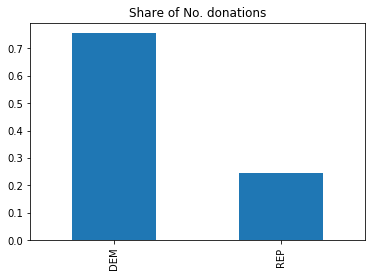

In [10]:
df.cand_pty_affiliation.value_counts(normalize=True).plot(
    kind="bar", title="Share of No. donations")
plt.show()

![title](https://www.dataquest.io/blog/content/images/2018/01/features.svg)

In [12]:
import pydotplus  # you can install pydotplus with: pip install pydotplus 
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [36]:
 from graphviz import Digraph

In [31]:
def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0: "D", 1: "R"},
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)  
    return Image(graph.create_png())

In [32]:
xtest.head()

,cycle,transaction_amt,cand_office_st_AK,cand_office_st_AL,cand_office_st_AR,cand_office_st_AZ,cand_office_st_CA,cand_office_st_CO,cand_office_st_CT,cand_office_st_DC,...,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,state_ZZ,classification_Engineer,classification_Math-Stat,classification_Scientist
37896,2012.0,500.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16316,2016.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
93919,2012.0,500.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28998,2016.0,50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14276,2016.0,50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## fit a decision tree with a single node (decision rule) 
on our training data and see how it perform on the test set:

In [33]:
t1 = DecisionTreeClassifier(max_depth=1, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]


In [34]:
print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Decision tree ROC-AUC score: 0.672


In [38]:
print_graph(t1, xtrain.columns)

InvocationException: GraphViz's executables not found

In [39]:
from IPython.display import Image
from IPython.core.display import HTML 


In [40]:
Image(url= "https://www.dataquest.io/blog/content/images/2018/01/output_6_1.png")

## Decision tree --- 不同的深度 
### Decision tree diffferent nodes
- ROC-AUC score: 0.672
- Each of the two leaves register their share of training samples, the class distribution within their share, and the class label prediction. 
   - ** bases its prediction on** 
   - whether the the size of the contribution is above 101.5: 
   - but it makes the same prediction regardless! 
**This is not too surprising given that 75% of all donations are to Democrats. **
But it's not making use of the data we have. Let's use three levels of decision rules and see what we can get:

In [42]:
t2 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t2.fit(xtrain, ytrain)
p = t2.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Decision tree ROC-AUC score: 0.751


In [43]:
Image(url= "https://www.dataquest.io/blog/content/images/2018/01/output_8_1.png")

This model is not much better than the simple decision tree: a measly 5% of all donations are predicted to go to Republicans–far short of the 25% we would expect. 

**A closer look tells us that the decision tree uses some dubious splitting rules. A whopping 47.3% of all observations end up in the left-most leaf, while another 35.9% end up in the leaf second to the right. The vast majority of leaves are therefore irrelevant. Making the model deeper just causes it to overfit.**

## Ensemble
### Decision tree --- different width
Fixing depth, a decision tree can be made more complex by **increasing "width", that is, creating several decision trees and combining them. **
In other words,** an ensemble of decision trees**.

To see why such a model would help, 
- consider how we may force a decision tree to investigate other patterns than those in the above tree.
**The simplest solution **is to remove features that appear early in the tree. 

Suppose for instance that we remove the transaction amount feature (transaction_amt), the root of the tree. New decision tree would look like this:

In [44]:
#The simplest solution is to remove features that appear early in the tree.
drop = ["transaction_amt"]

xtrain_slim = xtrain.drop(drop, 1)
xtest_slim = xtest.drop(drop, 1)

t3 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t3.fit(xtrain_slim, ytrain)
p = t3.predict_proba(xtest_slim)[:, 1]
print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Decision tree ROC-AUC score: 0.740


In [45]:
Image(url= "https://www.dataquest.io/blog/content/images/2018/01/output_10_1.png")

- The ROC-AUC score is similar, but the share of Republican donation increased to 7.3%. Still too low, but higher than before. 
- Importantly, in contrast to the first tree, where most of the rules related to the transaction itself, this tree is more focused on the residency of the candidate.

**We now have two models that by themselves have similar predictive power, but operate on different rules. Because of this, they are likely to make different prediction errors, which we can average out with an ensemble.**

## why averaging predictions work
Consider a toy example with two observations that we want to generate predictions for. 
- The true label for the first observation is Republican, 
- and the true label for the second observation is Democrat.
- In this toy example, suppose model 1 is prone to predicting Democrat 
- while model 2 is prone to predicting Republican, as in the below table:


 Model	
 Observation 1	 Truelabel	R	
 Observation 2   Truelabel  D
  
 Model         prediction: P(R)		
 
 Model 1:	ob1:0.4	           ob2:0.2
 
 Model 2:	ob1:0.8	           ob2:0.6
 
**If we use the standard 50% cutoff rule for making a class prediction,** each decision tree gets one observation right and one wrong. 

We create an ensemble by averaging the model's class probabilities, which is **a majority vote weighted by the strength (probability) of model's prediction.**

In our toy example, model 2 is certain of its prediction for observation 1, while model 1 is relatively uncertain. Weighting their predictions, the ensemble favors model 2 and correctly predicts Republican. For the second observation, tables are turned and the ensemble correctly predicts Democrat:

- Ensemble	ob1: 0.6(is R)	ob2:0.4(is R)

With more than two decision trees, the ensemble predicts in accordance with the majority. For that reason, an ensemble that averages classifier predictions is known **as a majority voting classifier.**

**When an ensembles averages based on probabilities (as above), we refer to it as soft voting, averaging final class label predictions is known as hard voting.**

Of course, ensembles are no silver bullet. You might have noticed in our toy example that for averaging to work,** prediction errors must be uncorrelated. If both models made incorrect predictions, the ensemble would not be able to make any corrections. ** 

**Moreover, in the soft voting scheme, if one model makes an incorrect prediction with a high probability value, the ensemble would be overwhelmed. **

**Generally, ensembles don't get every observation right, but in expectation it will do better than the underlying models.**

## A forest is an ensemble of trees

- build an ensemble out of our two decision trees. 
- We first check error correlation: highly correlated errors makes for poor ensembles.

In [54]:
print(t2.predict_proba(xtest)[:, 1],
t3.predict_proba(xtest_slim)[:, 1])

[ 0.39074693  0.07363521  0.39074693 ...,  0.39074693  0.39074693
  0.07363521] [ 0.42324371  0.          0.22095672 ...,  0.22095672  0.22095672  0.        ]


In [55]:
p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]

pd.DataFrame({"full_data": p1,
              "red_data": p2}).corr()

,full_data,red_data
full_data,1.000000,0.669128
red_data,0.669128,1.000000


**There is some correlation, but not overly so: there's still a good deal of prediction variance to exploit. **
- To build our first ensemble, we simply average the two model's predictions.

In [56]:
p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]
p = np.mean([p1, p2], axis=0)#简单的取了两个模型的绝对值
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.783


Indeed, the ensemble procedure leads to an increased score.
But maybe if we had 
## more diverse trees, 
we could get an even greater gain. **How should we choose which features to exclude when designing the decision trees?**

- A fast approach： to randomly select a subset of features, fit one decision tree on each draw and average their predictions. 
This process is known as **bootstrapped averaging** (often abbreviated bagging), 
- and when applied to decision trees, the resultant model is **a Random Forest**. 
### a random forest 
   - use the Scikit-learn implementation 
   - and build an ensemble of 10 decision trees, 
   - each fitted on a subset of 3 features.



In [57]:
from sklearn.ensemble import RandomForestClassifier
#10--trees,3 features for one tree
rf = RandomForestClassifier(
    n_estimators=10, 
    max_features=3,
    random_state=SEED
)

rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:, 1]
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.844


## Ensembles : averaged predictions
 
Our foray into ensembles so far has shown us two important aspects of ensembles:

- The less correlation in prediction errors, the better
- The more models, the better
**It's a good idea to use as different models as possible (as long as they perform decently).**

So far, we have relied on **simple averaging**, but later we will see to how use** more complex combinations**. To keep track of our progress, it is helpful to formalize our ensemble as n models fi averaged into an ensemble e
![title](https://www.kdnuggets.com/wp-content/uploads/ensemble-eq-1.jpg)

          - There's no limitation on what models to include: decision trees, linear models, kernel-based models, non-parametric models, neural networks or even other ensembles!
          - Keep in mind though that the more models we include, the slower the ensemble becomes.

1. To build an ensemble of various models, we
   - begin by benchmarking a set of Scikit-learn classifiers on the dataset. 
   - To avoid repeating code, we use the below helper functions:




In [58]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

In [59]:
def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models   #他是一个字典，里面包括了不同的模型和设定

In [60]:
get_models()

{'gbm': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=222, subsample=1.0, verbose=0,
               warm_start=False),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform'),
 'logistic': LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=222, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'mlp-nn': MLPClassifier(activation='relu', alpha=0.0001, 

In [61]:
def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))   #产生test集的array，rows=test的rows， 列=模型个数
    P = pd.DataFrame(P)   #转化array成为DF

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):   
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [63]:
def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")
    

**create a prediction matrix P, where each feature corresponds to the predictions made by a given model, and score each model against the test set:**


In [71]:
models = get_models()
P = np.zeros((ytest.shape[0], len(models)))   #产生test集的array，rows=test的rows， 列=模型个数
P = pd.DataFrame(P) 
print(P.head(),P.shape,ytest.shape)#7列的0 95000的预测


     0    1    2    3    4    5    6
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0 (95000, 7) (95000,)


In [82]:
models.items()

dict_items([('svm', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')), ('naive bayes', GaussianNB(priors=None)), ('mlp-nn', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=222,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)), ('random forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gin

In [83]:
#所有的模型
models = get_models()

#所有模型加入
P = train_predict(models)

score_models(P, ytest)

Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.

Scoring models.
svm                       : 0.850
knn                       : 0.779
naive bayes               : 0.803
mlp-nn                    : 0.851
random forest             : 0.844
gbm                       : 0.878
logistic                  : 0.857
Done.



That's our** baseline**. 
The Gradient Boosting Machine (GBM) does best, followed by a simple logistic regression. 
2. For our ensemble strategy to work, prediction errors must be relatively uncorrelated. Checking that this holds is our first order of business:

In [86]:
P.head()#P是每个模型预测的概率

,svm,knn,naive bayes,mlp-nn,random forest,gbm,logistic
0,0.347648,0.333333,5.020798e-10,0.156115,0.3,0.265998,0.149801
1,0.007823,0.000000,1.085367e-68,0.010601,0.0,0.017165,0.002533
2,0.555600,0.333333,6.701134e-14,0.226278,0.2,0.328002,0.284235
3,0.046424,0.000000,2.862588e-62,0.049854,0.0,0.024914,0.024563
4,0.004719,0.000000,1.020511e-61,0.027849,0.0,0.017396,0.004619


[MLENS] backend: threading


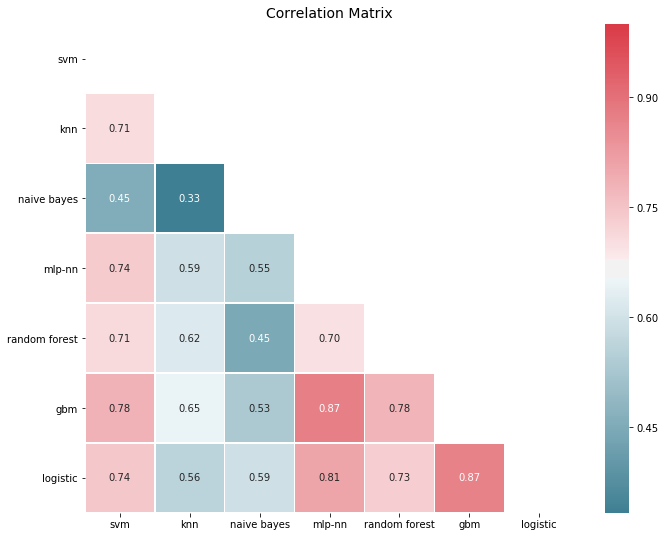

In [85]:
# You need ML-Ensemble for this figure: you can install it with: pip install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. 
Yet most correlations are in the 50-80% span, so there is decent room for improvement. 

In fact, if we look at **error correlations on a class prediction basis things **look a bit more promising:

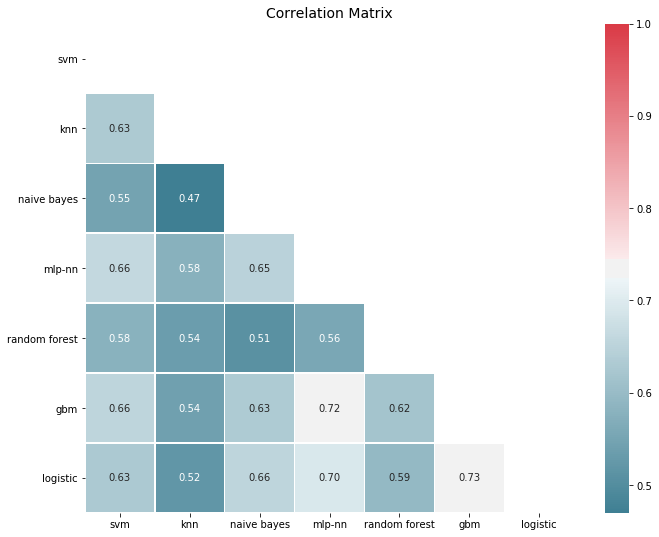

In [87]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - ytest.values).corr(), inflate=False)
plt.show()

# churn data. 
- This dataset contains imaginary data from a ride-sharing app with user behaviors over their first month of app usage in a set of imaginary cities as well as whether they used the service 5 months after sign-up. 
- use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark.

This is a typical setup for a churn prediction problem. To do this, you'll split the data into training and test sets, fit a small xgboost model on the training set, and evaluate its performance on the test set by computing its accuracy.

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [4]:
Xc = pd.read_csv("/Users/libolin/Downloads/chronic_kidney_disease.csv")

In [5]:
Xc.head()

,48,80,1.020,1,0,?,normal,notpresent,notpresent.1,121,...,44,7800,5.2,yes,yes.1,no,good,no.1,no.2,ckd
0,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [ ]:
# 1.产生新的arrays：Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]  
#X是所有变量除了倒数第一个，y是倒数第一个变量

#2.分开数据集 Create the training and test sets
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# 3.产生分类器xg_cl: Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# 4.分类器家.fit引入train数据: Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# 5.将fit后的分类器加入到test数据预测：Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# 6.查看最后的准确率 Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

#<script.py> output:
#    accuracy: 0.743300

# Decision trees
- make a simple decision tree using scikit-learn's DecisionTreeClassifier on the** breast cancer dataset**.
  - This dataset contains numeric measurements of various dimensions of individual tumors (such as perimeter and texture) from breast biopsies 
  - and a single outcome value (the tumor is either malignant, or benign).

In [3]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 1.分割数据 Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 2. 设定模型：产生决策树分类器：Instantiate the classifier: dt_clf_4  在最后的结尾Leaf之前最多可以有4个连续的分开点
dt_clf_4 = DecisionTreeClassifier(max_depth=4)
#This parameter specifies the maximum number of successive split points you can have before reaching a leaf node.

# 3对模型fit数据：Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# 4.使用模型预测数据：Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)


In [ ]:
# 5.衡量模型预测的准确率Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)
#np.sum(y_pred_4==y_test 预测相符的数量的和
#float（）转化成消暑
#y_test.shape[0] 总个数的量